In [49]:
def check_win(board, player):
    """
    Check if the player can win in the next move and return all such moves.
    """
    winning_moves = []
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                            (0, 4, 8), (2, 4, 6)]  # diagonals
    for a, b, c in winning_combinations:
        if board[a] == board[b] == player and board[c] == ' ':
            winning_moves.append(c)
        if board[a] == board[c] == player and board[b] == ' ':
            winning_moves.append(b)
        if board[b] == board[c] == player and board[a] == ' ':
            winning_moves.append(a)
    return winning_moves

def check_block(board, player):
    """
    Check if the opponent can win in the next move and return all blocking moves.
    """
    opponent = 'O' if player == 'X' else 'X'
    return check_win(board, opponent)

def is_unblocked_line(board, player, a, b, c):
    """
    Check if a line (defined by indices a, b, c) is unblocked for the given player.
    """
    return ((board[a] == board[b] == player and board[c] == ' ') or
            (board[a] == board[c] == player and board[b] == ' ') or
            (board[b] == board[c] == player and board[a] == ' '))

def check_fork(board, player):
    """
    Check if the player can create a fork and return all such moves.
    """
    fork_moves = []
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                            (0, 4, 8), (2, 4, 6)]  # diagonals
    for i in range(9):
        if board[i] == ' ':
            board[i] = player  # Temporarily place the player's marker
            unblocked_lines = 0  # Count of unblocked lines
            for a, b, c in winning_combinations:
                if is_unblocked_line(board, player, a, b, c):
                    unblocked_lines += 1
            if unblocked_lines >= 2:
                fork_moves.append(i)
            board[i] = ' '  # Reset the board
    return fork_moves

def is_two_in_a_row(board, player, a, b, c):
    return ((board[a] == player and board[b] == player and board[c] == ' ') or
            (board[a] == player and board[c] == player and board[b] == ' ') or
            (board[b] == player and board[c] == player and board[a] == ' '))

# Update the check_block_fork function to include the additional logic
def check_block_fork(board, player):
    opponent = 'O' if player == 'X' else 'X'
    forks = check_fork(board, opponent)

    # Check if opponent has two opposite corners
    if board[0] == board[8] == opponent:
        if board[2] == ' ' or board[6] == ' ':
            to_rtn = []
            for i in [1, 3, 5, 7]:
                if board[i] == ' ': to_rtn.append(i)
            return to_rtn
    if board[2] == board[6] == opponent:
        if board[0] == ' ' or board[8] == ' ':
            to_rtn = []
            for i in [1, 3, 5, 7]:
                if board[i] == ' ': to_rtn.append(i)
            return to_rtn

    if len(forks) > 1:
        two_in_a_row_moves = []
        winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                                (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                                (0, 4, 8), (2, 4, 6)]  # diagonals
        for i in range(9):
            if board[i] == ' ':
                board[i] = player  # Temporarily place the player's marker
                for a, b, c in winning_combinations:
                    if is_two_in_a_row(board, player, a, b, c):
                        two_in_a_row_moves.append(i)
                        break  # No need to check further combinations for this move
                board[i] = ' '  # Reset the board
        # Return intersection of two_in_a_row_moves and forks
        return list(set(two_in_a_row_moves) & set(forks))
    if len(forks) == 1:
        return forks
    return []

def check_center(board):
    """
    Check if the center is free and return it as a move if it is.
    """
    return [4] if board[4] == ' ' else []

def check_opposite_corner(board, player):
    """
    Check if the opponent is in the corner, and the opposite corner is free, and return all such moves.
    """
    opponent = 'O' if player == 'X' else 'X'
    opposite_corners = [(0, 8), (2, 6), (6, 2), (8, 0)]
    moves = []
    for a, b in opposite_corners:
        if board[a] == opponent and board[b] == ' ':
            moves.append(b)
        if board[b] == opponent and board[a] == ' ':
            moves.append(a)
    return moves

def check_empty_corner(board):
    """
    Check for any empty corners and return all such moves.
    """
    corners = [0, 2, 6, 8]
    return [corner for corner in corners if board[corner] == ' ']

def check_empty_side(board):
    """
    Check for any empty sides and return all such moves.
    """
    sides = [1, 3, 5, 7]
    return [side for side in sides if board[side] == ' ']

# Update Main Function

def get_optimal_moves(board, player):
    """
    Get all optimal moves for the given board and player.
    """
    for check in [check_win, check_block, check_fork, check_block_fork]:
        moves = check(board, player)
        if moves:
            return moves

    for check in [check_center, check_empty_corner, check_empty_side]:
        moves = check(board)
        if moves:
            return moves

    for check in [check_opposite_corner]:
        moves = check(board, player)
        if moves:
            return moves

    return []  # Should never reach this point in a valid game of Tic-Tac-Toe

In [23]:
# Check we win if we go optimally
import random

# All functions as provided above

def random_player_move(board):
    """
    Returns a random legal move for the current board.
    """
    legal_moves = [i for i, spot in enumerate(board) if spot == ' ']
    return random.choice(legal_moves) if legal_moves else None

def is_game_over(board):
    """
    Returns True if the game is over, along with the winner ('X' or 'O') if there is one.
    """
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),
                            (0, 4, 8), (2, 4, 6)]
    for a, b, c in winning_combinations:
        if board[a] == board[b] == board[c] and board[a] != ' ':
            return True, board[a]  # Winner!
    if ' ' not in board:
        return True, None  # Draw
    return False, None  # Game continues

def simulate_game_optimal():
    """
    Simulates a single game of Tic-Tac-Toe with one player making optimal moves and the other making random moves.
    Randomly chooses which player starts.
    """
    board = [' '] * 9  # Initialize an empty board
    player_turn = random.choice(['X', 'O'])  # Randomly choose who goes first

    while True:
        if player_turn == 'X':
            optimal_move = get_optimal_moves(board, 'X')
            move = optimal_move[0] if optimal_move else None
        else:  # For 'O', make a random move
            move = random_player_move(board)

        if move is not None:
            board[move] = player_turn
        else:
            break  # If no move is possible, the game is a draw

        game_over, winner = is_game_over(board)
        if game_over:
            return winner

        player_turn = 'O' if player_turn == 'X' else 'X'  # Switch turns

def simulate_n_games(n):
    """
    Simulates n games of Tic-Tac-Toe and prints out statistics of wins, losses, and draws.
    """
    results = {'X': 0, 'O': 0, 'Draw': 0}
    for _ in range(n):
        winner = simulate_game_optimal()
        if winner == 'X':
            results['X'] += 1
        elif winner == 'O':
            results['O'] += 1
        else:
            results['Draw'] += 1

    return results

# Run the simulation for 100 games
n = 10000
game_results = simulate_n_games(n)
print(f"Game results after {n} simulations:")
print(game_results)

Game results after 10000 simulations:
{'X': 9192, 'O': 0, 'Draw': 808}


In [50]:
# Initialize list to store sequences of all finished games
finished_games = []

def is_winner(board, player):
    """
    Check if the player has won on the current board.
    """
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                            (0, 4, 8), (2, 4, 6)]  # diagonals
    for a, b, c in winning_combinations:
        if board[a] == board[b] == board[c] == player:
            return True
    return False

def simulate_game(board, move_sequence, next_player):
    """
    Simulate a game of Tic-Tac-Toe recursively.
    
    Parameters:
        board (list): The current game board.
        move_sequence (list): The sequence of moves made so far.
        next_player (str): The player to move next ('X' or 'O').
    """
    
    # Check for game over conditions (win or draw)
    if is_winner(board, 'X') or is_winner(board, 'O'):
        finished_games.append(move_sequence[:])
        return
    if ' ' not in board:
        finished_games.append(move_sequence[:])
        return
    
    # Optimal player's move
    if next_player == 'X':
        optimal_moves = get_optimal_moves(board, next_player)
        for move in optimal_moves:
            board[move] = next_player  # Make the move
            move_sequence.append(move)  # Record the move
            simulate_game(board, move_sequence, 'O')  # Recursive call
            board[move] = ' '  # Undo the move
            move_sequence.pop()  # Remove the last move from the sequence
    
    # All moves for the non-optimal player
    else:
        for move in range(9):
            if board[move] == ' ':
                board[move] = next_player  # Make the move
                move_sequence.append(move)  # Record the move
                simulate_game(board, move_sequence, 'X')  # Recursive call
                board[move] = ' '  # Undo the move
                move_sequence.pop()  # Remove the last move from the sequence

# Initialize board and move_sequence
initial_board = [' ' for _ in range(9)]
initial_move_sequence = []

# Start the simulation with 'X' going first
simulate_game(initial_board, initial_move_sequence, 'X')

# Show some of the finished games to verify correctness
finished_games[:10], len(finished_games)

([[4, 0, 2, 1, 6],
  [4, 0, 2, 3, 6],
  [4, 0, 2, 5, 6],
  [4, 0, 2, 6, 3, 1, 5],
  [4, 0, 2, 6, 3, 5, 8, 1, 7],
  [4, 0, 2, 6, 3, 5, 8, 7, 1],
  [4, 0, 2, 6, 3, 7, 5],
  [4, 0, 2, 6, 3, 8, 5],
  [4, 0, 2, 7, 6],
  [4, 0, 2, 8, 6]],
 488)

In [51]:
import pickle

# Save the list of lists to appropriate file
with open('finished_games.pkl', 'wb') as f:
    pickle.dump(finished_games, f)

# Load the list of lists from appropriate file
with open('finished_games.pkl', 'rb') as f:
    finished_games = pickle.load(f)

In [4]:
finished_games

[[4, 0, 2, 1, 6],
 [4, 0, 2, 3, 6],
 [4, 0, 2, 5, 6],
 [4, 0, 2, 6, 3, 1, 5],
 [4, 0, 2, 6, 3, 5, 8, 1, 7],
 [4, 0, 2, 6, 3, 5, 8, 7, 1],
 [4, 0, 2, 6, 3, 7, 5],
 [4, 0, 2, 6, 3, 8, 5],
 [4, 0, 2, 7, 6],
 [4, 0, 2, 8, 6],
 [4, 0, 6, 1, 2],
 [4, 0, 6, 2, 1, 3, 7],
 [4, 0, 6, 2, 1, 5, 7],
 [4, 0, 6, 2, 1, 7, 8, 3, 5],
 [4, 0, 6, 2, 1, 7, 8, 5, 3],
 [4, 0, 6, 2, 1, 8, 7],
 [4, 0, 6, 3, 2],
 [4, 0, 6, 5, 2],
 [4, 0, 6, 7, 2],
 [4, 0, 6, 8, 2],
 [4, 0, 8, 1, 2, 3, 5],
 [4, 0, 8, 1, 2, 3, 6],
 [4, 0, 8, 1, 2, 5, 6],
 [4, 0, 8, 1, 2, 6, 5],
 [4, 0, 8, 1, 2, 7, 5],
 [4, 0, 8, 1, 2, 7, 6],
 [4, 0, 8, 2, 1, 3, 7],
 [4, 0, 8, 2, 1, 5, 7],
 [4, 0, 8, 2, 1, 6, 7],
 [4, 0, 8, 2, 1, 7, 6, 3, 5],
 [4, 0, 8, 2, 1, 7, 6, 5, 3],
 [4, 0, 8, 3, 6, 1, 7],
 [4, 0, 8, 3, 6, 1, 2],
 [4, 0, 8, 3, 6, 2, 7],
 [4, 0, 8, 3, 6, 5, 7],
 [4, 0, 8, 3, 6, 5, 2],
 [4, 0, 8, 3, 6, 7, 2],
 [4, 0, 8, 5, 6, 1, 7],
 [4, 0, 8, 5, 6, 1, 2],
 [4, 0, 8, 5, 6, 2, 7],
 [4, 0, 8, 5, 6, 3, 7],
 [4, 0, 8, 5, 6, 3, 2],
 [4, 0, 8, 5, 6,

In [5]:
# Initialize list to store sequences of all finished games
finished_games_O_first = []
o_wins = 0

def simulate_game_O_first(board, move_sequence):
    """
    Simulate a game of Tic-Tac-Toe recursively where 'O' goes first.
    
    Parameters:
        board (list): The current game board.
        move_sequence (list): The sequence of moves made so far.
    """
    
    # Check for game over conditions (win or draw)
    if is_winner(board, 'X') or is_winner(board, 'O'):
        # if is_winner(board, 'X'): print("X won!")
        # if is_winner(board, 'O'): 
        #     print("O won!")
        finished_games_O_first.append(move_sequence[:])
        return
    if ' ' not in board:
        finished_games_O_first.append(move_sequence[:])
        return
    
    # All moves for the non-optimal player
    for move in range(9):
        if board[move] == ' ':
            board[move] = 'O'  # Make the move
            move_sequence.append(move)  # Record the move

            # Optimal player's move
            optimal_moves = get_optimal_moves(board, 'X')
            for x_move in optimal_moves:
                board[x_move] = 'X'  # Make the move
                move_sequence.append(x_move)  # Record the move 
                simulate_game_O_first(board, move_sequence)  # Recursive call
                board[x_move] = ' '  # Undo the move
                move_sequence.pop()  # Remove the last move from the sequence
                
            board[move] = ' '  # Undo the move
            move_sequence.pop()  # Remove the last move from the sequence

# Initialize board and move_sequence
initial_board = [' ' for _ in range(9)]
initial_move_sequence = []

# Start the simulation with 'O' going first
simulate_game_O_first(initial_board, initial_move_sequence)

# Show some of the finished games to verify correctness
finished_games_O_first[:10], len(finished_games_O_first)

([[0, 4, 1, 2, 3, 6],
  [0, 4, 1, 2, 5, 6],
  [0, 4, 1, 2, 6, 3, 7, 5],
  [0, 4, 1, 2, 6, 3, 8, 5],
  [0, 4, 1, 2, 7, 6],
  [0, 4, 1, 2, 8, 6],
  [0, 4, 2, 1, 3, 7],
  [0, 4, 2, 1, 5, 7],
  [0, 4, 2, 1, 6, 7],
  [0, 4, 2, 1, 8, 7]],
 656)

In [6]:
from torch.utils.data import Dataset, DataLoader
import torch

# Define the TicTacToeDataset class
class TicTacToeDataset(Dataset):
    def __init__(self, finished_games_X_first, finished_games_O_first):
        self.data = []
        
        # For games where X went first
        for game in finished_games_X_first:
            for i in range(1, len(game), 2):  # Only X's moves
                sub_seq = [9] + game[:i]
                self.data.append((sub_seq, game[i]))
        
        # For games where X went second
        for game in finished_games_O_first:
            for i in range(0, len(game), 2):  # Only X's moves
                sub_seq = [9] + game[:i+1]
                self.data.append((sub_seq, game[i+1]))
                
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# Custom collate function to handle sequences of varying lengths
def custom_collate(batch):
    sequences, labels = zip(*batch)
    
    # Pad sequences in the batch
    max_length = max([len(seq) for seq in sequences])
    padded_sequences = [seq + [10] * (max_length - len(seq)) for seq in sequences]  # Using 10 as the padding token
    
    # Convert to PyTorch tensors
    padded_sequences = torch.tensor(padded_sequences, dtype=torch.long)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return padded_sequences, labels

# Initialize the DataLoader with the custom collate function
tic_tac_toe_dataset = TicTacToeDataset(finished_games, finished_games_O_first)
data_loader = DataLoader(tic_tac_toe_dataset, batch_size=4, shuffle=True, collate_fn=custom_collate)

# Show a sample batch to validate the Dataset and DataLoader
for batch in data_loader:
    sample_batch = batch
    break

sample_batch

(tensor([[ 9,  4,  0,  6, 10, 10],
         [ 9,  4, 10, 10, 10, 10],
         [ 9,  8,  4,  1,  2,  5],
         [ 9,  4,  2,  6, 10, 10]]),
 tensor([2, 7, 6, 7]))

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device('mps')

class TicTacToeTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_layers, num_classes):
        super(TicTacToeTransformer, self).__init__()
        
        # Embedding Layer
        self.embedding = nn.Embedding(11, d_model)  # 11 classes: board positions (0-8), start (9), and padding (10)
        
        # Positional Encoding
        # positional_encoding = torch.arange(1, 11).unsqueeze(1).repeat(1, d_model)  # Create a (10, d_model) tensor with values from 1 to 10
        # self.register_buffer('positional_encoding', positional_encoding.float())  # Register it as a buffer
        # Positional Encoding
        self.positional_encoding = self.create_positional_encoding(d_model)
        #self.position_embedding = nn.Embedding(num_embeddings=20000, embedding_dim=d_model)
        
        # Transformer Decoder
        self.transformer = nn.Transformer(d_model, nhead, num_layers, num_layers, dim_feedforward=d_model*4)
        
        # Output Layer
        self.fc_out = nn.Linear(d_model, num_classes)

        # Initialisation function
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def create_positional_encoding(self, d_model, max_len=20000):
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)  # Shape (max_len, 1, d_model)
        return pe.to(device)
        
    def forward(self, x, targets=None):
        # Robustly get the index of the first padding token (index = 10) for each sequence in the batch
        pad_idx = torch.tensor([seq.tolist().index(10) if 10 in seq.tolist() else seq.size(0) - 1 for seq in x])
        
        # Embedding
        x = self.embedding(x)
        
        # Positional Encoding (Added to the embedding)
        #x += self.positional_encoding[:x.size(1), :]  # Only add positional encoding up to the sequence length
        x += self.positional_encoding[:x.size(0), :]
        
        # Permute the tensor dimensions to match transformer's expected input shape
        x = x.permute(1, 0, 2)
        
        # Transformer Forward Pass
        tgt_mask = self.transformer.generate_square_subsequent_mask(x.size(0)).to(x.device)
        x = self.transformer(x, x, tgt_mask=tgt_mask)
        
        # Permute back to (batch_size, seq_length, d_model) for the output layer
        x = x.permute(1, 0, 2)
        
        # Output Layer
        # Use gathered indices to pick the logits corresponding to the last non-padding token
        logits = self.fc_out(x[torch.arange(x.size(0)), pad_idx, :])
        
        # Loss calculation, if targets are provided
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits, targets, ignore_index=10)  # 10 is the padding token
        
        return logits, loss

d_model = 64  # Dimension of the model
nhead = 4  # Number of heads in multi-head attention
num_layers = 2  # Number of transformer layers
num_classes = 9  # Number of board positions

# Initialize the model
model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.to(device)

# Perform a forward pass using the sample batch
sample_sequences, sample_labels = sample_batch
logits, loss = model(sample_sequences.to(device), sample_labels.to(device))

logits.shape, F.softmax(logits, dim=1), loss

(torch.Size([4, 9]),
 tensor([[0.1296, 0.1307, 0.1059, 0.1229, 0.0899, 0.0989, 0.0988, 0.1117, 0.1115],
         [0.1277, 0.1266, 0.1173, 0.1172, 0.0891, 0.0999, 0.1022, 0.1071, 0.1128],
         [0.1341, 0.1179, 0.1238, 0.1202, 0.0884, 0.0951, 0.1071, 0.1074, 0.1059],
         [0.1313, 0.1199, 0.1131, 0.1278, 0.0896, 0.0894, 0.1182, 0.1163, 0.0944]],
        device='mps:0', grad_fn=<SoftmaxBackward0>),
 tensor(2.2162, device='mps:0', grad_fn=<NllLossBackward0>))

In [74]:
import torch
import numpy as np
import random

def is_game_over(board):
    # Function to check if the game is over and return the winner if there is one
    winning_positions = [
        (0, 1, 2), (3, 4, 5), (6, 7, 8), # Horizontals
        (0, 3, 6), (1, 4, 7), (2, 5, 8), # Verticals
        (0, 4, 8), (2, 4, 6)             # Diagonals
    ]
    for (x, y, z) in winning_positions:
        if board[x] == board[y] == board[z] != 9: # 9 represents an empty space
            return True, board[x] # Return True and the winner
    if 9 not in board:
        return True, -1 # Game is a draw
    return False, None # Game is not over

def get_legal_moves(board):
    return [i for i, x in enumerate(board) if x == 9] # 9 represents an empty space

def random_player_move(board):
    legal_moves = get_legal_moves(board)
    return random.choice(legal_moves) if legal_moves else None

def model_move(model, board, device):
    # Convert the board to a tensor and add a batch dimension.
    board_tensor = torch.tensor([9]+board, dtype=torch.long).unsqueeze(0).to(device)
    
    # Get the move probabilities from the model.
    with torch.no_grad():
        logits, _ = model(board_tensor)
    probabilities = F.softmax(logits, dim=1).squeeze(0).cpu().numpy()
    
    # Get the legal moves and set the probabilities of illegal moves to 0.
    legal_moves = get_legal_moves(board)
    illegal_moves = [i for i in range(9) if i not in legal_moves]
    probabilities[illegal_moves] = 0
    
    # Choose the legal move with the highest probability.
    return np.argmax(probabilities)

def print_board(board):
    # The board is expected to be a list of characters: 'X', 'O', or ' '
    print(f"{board[0]}|{board[1]}|{board[2]}")
    print("-+-+-")
    print(f"{board[3]}|{board[4]}|{board[5]}")
    print("-+-+-")
    print(f"{board[6]}|{board[7]}|{board[8]}")
    print()

def random_player_move(board):
    # Generate a list of legal moves
    legal_moves = [i for i, spot in enumerate(board) if spot == ' ']
    # Choose a random move if there are legal moves available
    return random.choice(legal_moves) if legal_moves else None

def translate_board(board_numeric):
    return [' ' if x == 9 else ('X' if x == 1 else 'O') for x in board_numeric]

def simulate_game_stats(model, device, n=1):
    results = {'model_wins': 0, 'random_wins': 0, 'draws': 0}
    for _ in range(n):
        board = [9] * 9 # 9 represents an empty space
        model_turn = random.choice([True, False])
        game_over = False
        
        while not game_over:
            if model_turn:
                move = model_move(model, board, device)
                board[move] = 1 # Assume 1 represents the model's moves
            else:
                # Make a random legal move (without using random_player_move function)
                move = random.choice([i for i, spot in enumerate(board) if spot == 9])
                if move is not None:
                    board[move] = 0 # Assume 0 represents the random player's moves
            
            game_over, winner = is_game_over(board)
            model_turn = not model_turn # Switch turns

            if game_over:
                if winner == 1:
                    results['model_wins'] += 1
                elif winner == 0:
                    results['random_wins'] += 1
                else:
                    results['draws'] += 1
    
    return results

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Hyperparameters
learning_rate = 1e-3
epochs = 1000  # Number of epochs to train for

d_model = 128  # Dimension of the model
nhead = 8  # Number of heads in multi-head attention
num_layers = 2  # Number of transformer layers
num_classes = 9  # Number of board positions

# Initialize the model
from_pretrained=False
name = "tic_tac_toe_transformer"
if from_pretrained:
    model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
    model.load_state_dict(torch.load(f'{name}.pth'))
else: model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)

# Define the device as 'cuda' if available, else 'cpu'
device = torch.device('mps')

# Move the model to the appropriate device
model.to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define the DataLoader
batch_size = 2048
data_loader = DataLoader(tic_tac_toe_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)

# Training loop
model.eval() 
train_losses, model_win_p = [], []
results = simulate_game_stats(model, device, n=100)
print(f"Simulation results - Model wins: {results['model_wins']}, Random wins: {results['random_wins']}, Draws: {results['draws']}")
model.train()
for epoch in tqdm(range(epochs), desc='Epochs'):
    total_loss = 0
    for batch_idx, (sequences, labels) in enumerate(data_loader):
        # Move data to the device
        sequences, labels = sequences.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits, loss = model(sequences, labels)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Aggregate the loss
        total_loss += loss.item()
    
    # Print the average loss for the epoch
    avg_loss = total_loss / (batch_idx + 1)
    # If we have beat our current best loss, save the model
    if len(train_losses) > 0 and avg_loss < min(train_losses):
        torch.save(model.state_dict(), f'{name}.pth')

    train_losses.append(avg_loss)
    if (epoch+1) % 10 == 0:
            
        print(f'Epoch {epoch+1} completed: Avg. Loss: {avg_loss:.4f}')
        # Set the model to evaluation mode for simulation
        model.eval()
        # Simulate games
        results = simulate_game_stats(model, device, n=100)
        print(f"Simulation results - Model wins: {results['model_wins']}, Random wins: {results['random_wins']}, Draws: {results['draws']}")
        model_win_p.append(results['model_wins'] / 100)
        model.train()

torch.save(model.state_dict(), f'{name}.pth')
print('Model training complete and saved to disk.')

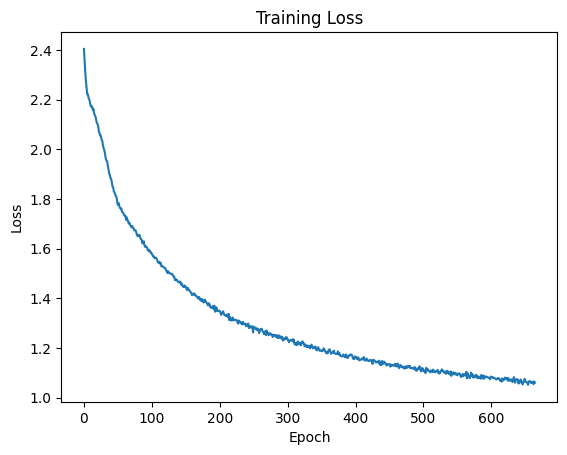

In [10]:
# Plot the training losses nicely
import matplotlib.pyplot as plt

# Plot with circles at each data point
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Test it by playing against a random player

In [85]:
def model_move(model, board, device):
    # Convert the board to a tensor and add a batch dimension.
    board_tensor = torch.tensor([9]+board, dtype=torch.long).unsqueeze(0).to(device)
    
    # Get the move probabilities from the model.
    with torch.no_grad():
        logits, _ = model(board_tensor)
    probabilities = F.softmax(logits, dim=1).squeeze(0).cpu().numpy()
    
    # Get the legal moves and set the probabilities of illegal moves to 0.
    legal_moves = get_legal_moves(board)
    illegal_moves = [i for i in range(9) if i not in legal_moves]
    probabilities[illegal_moves] = 0
    
    # Choose the legal move with the highest probability.
    return np.argmax(probabilities)

def is_model_move_optimal(model, board_sequence, player, device):
    # Translate the sequence to the Tic-Tac-Toe board format
    board = translate_sequence_to_board(board_sequence)
    
    # Get the list of optimal moves for the player
    optimal_moves = get_optimal_moves(board, player)
    
    # Get the model's move
    model_chosen_move = model_move(model, board_sequence, device)
    print(f"Model's move: {model_chosen_move}")
    print(f"Optimal moves: {optimal_moves}")
    
    # Check if the model's move is in the list of optimal moves
    return model_chosen_move in optimal_moves

def translate_sequence_to_board(sequence):
    board = [' '] * 9
    player = 'X'  # Assume 'X' starts the game
    for move in sequence:
        if move in range(9):  # Ensure the move is within the board
            board[move] = player
            player = 'O' if player == 'X' else 'X'  # Switch player
        else:
            raise ValueError("Invalid move found in the sequence")
    return board

def get_legal_moves(board):
    return [i for i in range(9) if i not in board]

model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.load_state_dict(torch.load(f'{name}.pth'))
model.to(device)


sequence = [4, 1, 0, 8]
is_model_move_optimal(model, sequence, 'X', device)

Model's move: 6
Optimal moves: [3, 6]


True

In [89]:
from random import choice
import numpy as np
import torch
import torch.nn.functional as F

# Assuming the necessary components and functions such as `is_game_over`, `get_legal_moves`, etc., are already defined.

def simulate_n_games_with_optimal_tracking(model, device, n):
    """
    Simulates n games of Tic-Tac-Toe and tracks the percentage of optimal moves made by the model.
    """
    results = {'X': 0, 'O': 0, 'Draw': 0, 'Optimal Moves': 0, 'Total Model Moves': 0}

    for _ in range(n):
        board = [' '] * 9
        sequence = []  # Initialize the move sequence
        model_turn = choice(['X', 'O'])  # Randomly choose who goes first
        game_over = False

        while not game_over:
            if model_turn == 'X':  # Model's turn to play
                legal_moves = get_legal_moves(board)
                if legal_moves:
                    # Get the model's move
                    model_move_index = model_move(model, sequence, device)
                    if model_move_index in get_optimal_moves(board, 'X'):
                        results['Optimal Moves'] += 1
                    board[model_move_index] = 'X'
                    sequence.append(model_move_index)  # Update the move sequence
                results['Total Model Moves'] += 1
            else:  # Random player's turn to play
                legal_moves = get_legal_moves(board)
                if legal_moves:
                    random_move = choice(legal_moves)
                    board[random_move] = 'O'
                    sequence.append(random_move)  # Update the move sequence

            game_over, winner = is_game_over(board)
            model_turn = 'O' if model_turn == 'X' else 'X'  # Switch turns

            if game_over:
                if winner == 'X':
                    results['X'] += 1
                elif winner == 'O':
                    results['O'] += 1
                else:
                    results['Draw'] += 1

    # Calculate the percentage of optimal moves
    if results['Total Model Moves'] > 0:
        optimal_move_percentage = (results['Optimal Moves'] / results['Total Model Moves']) * 100
    else:
        optimal_move_percentage = 0

    # Print the results
    print(f"X wins: {results['X']}")
    print(f"O wins: {results['O']}")
    print(f"Draws: {results['Draw']}")
    print(f"Optimal move percentage: {optimal_move_percentage:.2f}%")
    
    return results

# Load the model
model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.load_state_dict(torch.load(f'{name}.pth'))
model.to(device)

# Simulate the games
simulate_n_games_with_optimal_tracking(model, device, 100)

X wins: 58
O wins: 36
Draws: 6
Optimal move percentage: 32.03%


{'X': 58, 'O': 36, 'Draw': 6, 'Optimal Moves': 139, 'Total Model Moves': 434}

In [88]:
import torch
import numpy as np
import random

# Load the trained model
model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.load_state_dict(torch.load(f'{name}.pth'))
model.to(device)
model.eval() # Set the model to evaluation mode

# Simulate games
n=100
results = simulate_game_stats(model, device, n=n)
print(f"Out of {n} games, the model won {results['model_wins']} times, the random player won {results['random_wins']} times, and there were {results['draws']} draws.")

/Users/charlesoneill/miniconda3/envs/honours/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Out of 100 games, the model won 0 times, the random player won 0 times, and there were 100 draws.


In [48]:
# Load the trained model
def compare_moves_and_probabilities(model, board, optimal_moves, device):
    # Translate the board from 'X', 'O', ' ' to numeric format
    numeric_board = [1 if x == 'X' else 0 if x == 'O' else 9 for x in board]
    
    # Convert the numeric board to tensor, add batch dimension, and add the start token
    board_with_start = [9] + numeric_board  # Include the start token
    board_tensor = torch.tensor(board_with_start, dtype=torch.long).unsqueeze(0).to(device)
    
    # Get move probabilities from the model
    with torch.no_grad():
        logits, _ = model(board_tensor)
    probabilities = F.softmax(logits, dim=1).squeeze(0).cpu().numpy()

    # Print the board
    print_board(board)
    
    # Print optimal moves
    print(f"Optimal moves according to the algorithm: {optimal_moves}")
    
    # Print model's move probabilities, skipping the first element for the start token
    print("Model's move probabilities for each position (excluding start token):")
    for i, prob in enumerate(probabilities): 
        print(f"Position {i}: {prob:.4f}")
    print()

# TO-DO: Fix this diagnostic function
def simulate_and_compare(model, device, num_games=500):
    for game_index in range(num_games):
        # Initialize the game board with ' ' representing empty spaces
        board = [' '] * 9
        player = 'X'  # Assume the model plays 'X'
        opponent = 'O'  # Assume the opponent plays 'O'

        # Randomly choose who goes first
        model_turn = random.choice([True, False])

        game_over = False
        while not game_over:
            if model_turn:
                # Convert the board to the model's expected numeric input format
                numeric_board = [1 if x == player else 0 if x == opponent else 9 for x in board]
                # Get the optimal moves for the model
                optimal_moves = get_optimal_moves(board, player)  # Un-comment this line
                # Make the model's move
                chosen_move = model_move(model, numeric_board, device)
                # Update the board with the model's move
                board[chosen_move] = player
                # Compare and print the probabilities and optimal moves
                compare_moves_and_probabilities(model, board, optimal_moves, device)  # Now passing optimal_moves
            else:
                move = random_player_move(board)
                if move is not None:  # Safeguard to check if move is valid
                    board[move] = opponent

            # Check if game is over
            game_over, winner = is_game_over(board)
            if game_over:
                # Print the result of the game
                print(f"Game {game_index + 1}: Winner is {'Model' if winner == player else 'Opponent' if winner == opponent else 'None'}, draw" if winner == -1 else "")
                print_board(board)

            # Switch turns
            model_turn = not model_turn

d_model = 128  # Dimension of the model
nhead = 8  # Number of heads in multi-head attention
num_layers = 2  # Number of transformer layers
num_classes = 9  # Number of board positions
model = TicTacToeTransformer(d_model, nhead, num_layers, num_classes)
model.load_state_dict(torch.load(f'{name}.pth'))
model.to(device)
model.eval()  # Set the model to evaluation mode

# Simulate a few games and compare the moves
simulate_and_compare(model, device, num_games=1000)


 |O| 
-+-+-
 | | 
-+-+-
 | | 


 | | 
-+-+-
 | | 
-+-+-
 |O| 

 | | 
-+-+-
 | | 
-+-+-
 | |X

Optimal moves according to the algorithm: [4]
Model's move probabilities for each position (excluding start token):
Position 0: 0.2280
Position 1: 0.0007
Position 2: 0.0984
Position 3: 0.0060
Position 4: 0.4941
Position 5: 0.0018
Position 6: 0.0326
Position 7: 0.0153
Position 8: 0.1232


 | | 
-+-+-
 | | 
-+-+-
 | |X

 | | 
-+-+-
 | | 
-+-+-
 | |X

Optimal moves according to the algorithm: [4]
Model's move probabilities for each position (excluding start token):
Position 0: 0.2280
Position 1: 0.0007
Position 2: 0.0984
Position 3: 0.0060
Position 4: 0.4941
Position 5: 0.0018
Position 6: 0.0326
Position 7: 0.0153
Position 8: 0.1232


 | | 
-+-+-
 | | 
-+-+-
 | |X


O| | 
-+-+-
 | | 
-+-+-
 | | 


 | | 
-+-+-
 | | 
-+-+-
 | |O


 | | 
-+-+-
 | |O
-+-+-
 | | 

 | | 
-+-+-
 | | 
-+-+-
 | |X

Optimal moves according to the algorithm: [4]
Model's move probabilities for each position (excluding start